In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Importación de data

In [227]:
df = pd.read_csv('/content/drive/MyDrive/MASTER DATA SCIECE/M0. Capstone/Aaron/Trading_Algoritmico-BTC/BTCUSDT_velas_15.csv',sep=',', index_col=0)
df['Close time'] = pd.to_datetime(df['Close time'])
df =  df.set_index('Close time')
# df =  df.set_index('Close time').resample('D')['Close'].mean()
df

,Open time,Open,High,Low,Close,Volume,Quote assert volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Close time,,,,,,,,,,,
2019-01-01 00:14:59.999,2019-01-01 00:00:00,3701.23,3703.72,3689.88,3697.31,190.974095,7.059148e+05,1325,106.065467,3.921042e+05,0
2019-01-01 00:29:59.999,2019-01-01 00:15:00,3697.91,3698.75,3690.56,3694.20,131.742721,4.866613e+05,1073,74.943180,2.768597e+05,0
2019-01-01 00:44:59.999,2019-01-01 00:30:00,3693.96,3705.00,3693.00,3702.39,171.877714,6.358759e+05,1589,95.601285,3.536763e+05,0
2019-01-01 00:59:59.999,2019-01-01 00:45:00,3702.05,3713.00,3695.02,3700.31,191.772890,7.106172e+05,1547,94.245382,3.493222e+05,0
2019-01-01 01:14:59.999,2019-01-01 01:00:00,3700.20,3702.73,3691.22,3701.03,139.872706,5.171780e+05,1357,74.994622,2.773194e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 23:14:59.999,2022-12-19 23:00:00,16416.82,16459.18,16373.43,16382.34,3127.652070,5.132545e+07,69586,1523.437960,2.500099e+07,0
2022-12-19 23:29:59.999,2022-12-19 23:15:00,16382.34,16428.99,16373.14,16423.25,2542.894310,4.169301e+07,55397,1340.155230,2.197322e+07,0
2022-12-19 23:44:59.999,2022-12-19 23:30:00,16423.25,16442.35,16410.25,16440.90,2062.223700,3.387183e+07,49406,1081.777110,1.776870e+07,0


In [228]:
df = pd.DataFrame(df, columns=['Close'])
df

,Close
Close time,
2019-01-01 00:14:59.999,3697.31
2019-01-01 00:29:59.999,3694.20
2019-01-01 00:44:59.999,3702.39
2019-01-01 00:59:59.999,3700.31
2019-01-01 01:14:59.999,3701.03
...,...
2022-12-19 23:14:59.999,16382.34
2022-12-19 23:29:59.999,16423.25
2022-12-19 23:44:59.999,16440.90


## Funciones

In [113]:
def fit_straight_line(y, deg = 1):
    '''
    Fits a straight line between 2 data points.
    '''
    x_values = np.linspace(0, 1, len(y))

    coeffs = np.polyfit(x = x_values, y = y, deg = deg)
    poly_eqn = np.poly1d(coeffs)

    y_hat = poly_eqn(x_values)
    
    return y_hat

def plot_single_ts(df, ax,title, target_column, fit_line):
    '''
    Plots a Time Series data based on the origin you pass.
    '''
    x = df.index
    y = df[target_column]
    
    if fit_line:
        y_hat = fit_straight_line(y = y)
        ax.plot(x, y_hat, color = "orange", label = "Trend")
    
    ax.plot(x, y, label = title, lw = 4)
    ax.legend(loc = "upper left")

def plot_time_series(df, target_column, fit_line):
    '''
    Plots all the available time series.
    '''
    fig = plt.figure(figsize = (30, 8))
    ax1 = fig.subplots(1, 1)

    ##FALTA ORIGIN POSIBLE ERROR
    plot_single_ts(df = df, ax = ax1, title= 'BTC' ,target_column = target_column, fit_line = fit_line)
    # plot_single_ts(df = df, ax = ax1, origin = "Google", target_column = target_column, fit_line = fit_line)

    fig.tight_layout()    

# Evaluación Gráfica y Estacionaria

1.   Adfuller
2.   Coeficiente P y Q


## Adfuller

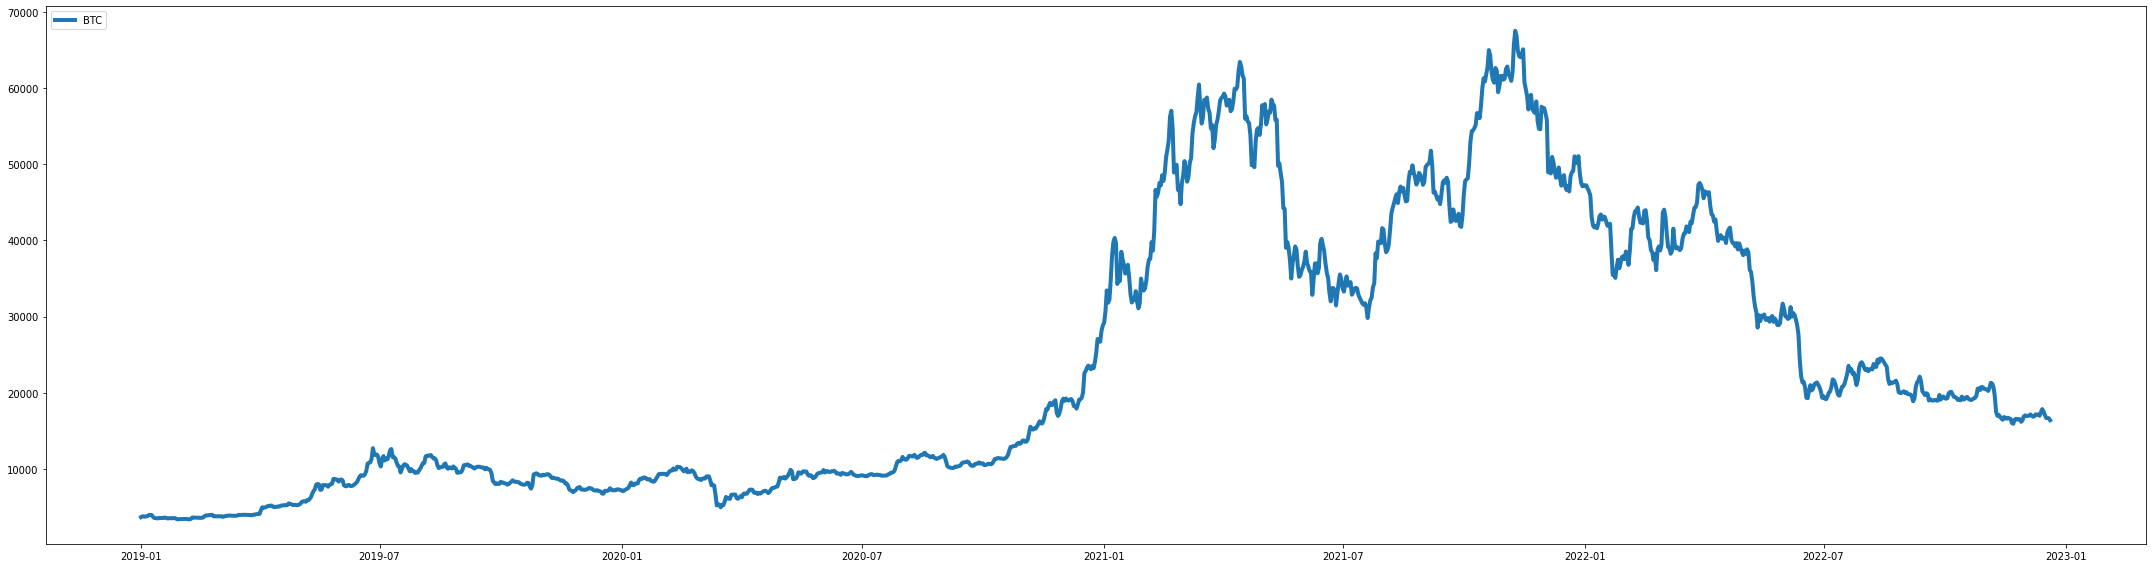

In [114]:
plot_time_series(df = df, target_column = "Close", fit_line = False)

In [115]:
resultado_analisis = adfuller(df)

valor_estadistico_adf = round(resultado_analisis[0], 3)
p_valor = round(resultado_analisis[1], 3)

print("Valor estadistico de ADF de las tablas precalculadas: {}".format(-2.89))
print("Valor estadistico de ADF: {}\n".format(valor_estadistico_adf))

print("Nivel de significación para tomar la serie como estacionaria {}".format(0.05))
print("p-valor: {}\n".format(p_valor))
# No estacionaria

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -1.459

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.554



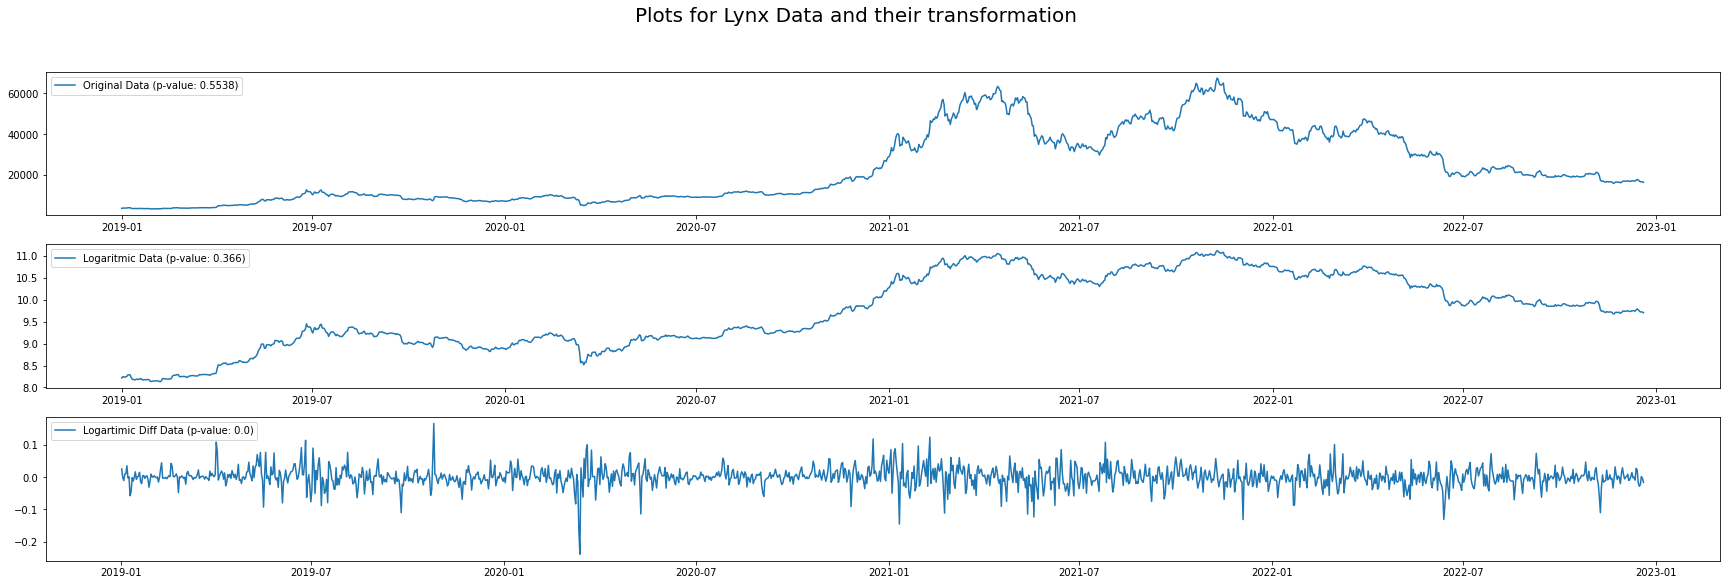

In [116]:
df["Close_log"] = df["Close"].apply(np.log1p)
df["Close_log_diff"] = df["Close_log"].diff()

fig = plt.figure(figsize = (30, 9))
ax1, ax2, ax3 = fig.subplots(3, 1)

# select x and y to plot
xlynx = df.index

Close = df["Close"]
Close_log = df["Close_log"]
Close_log_diff = df["Close_log_diff"]

# plotting part
ax1.plot(xlynx, Close, label = f"Original Data (p-value: {round(adfuller(Close)[1], 4)})")
ax2.plot(xlynx, Close_log, label = f"Logaritmic Data (p-value: {round(adfuller(Close_log)[1], 4)})")
ax3.plot(
    xlynx, 
    Close_log_diff, 
    label = f"Logartimic Diff Data (p-value: {round(adfuller(Close_log_diff.dropna())[1], 4)})"     #No es 0 está redondeado
)

ax1.legend(loc = "upper left")
ax2.legend(loc = "upper left")
ax3.legend(loc = "upper left")

fig.suptitle("Plots for Lynx Data and their transformation", fontsize = 20);

In [117]:
Close_log_diff.dropna(inplace = True)

## Obtención P y Q

In [121]:
xlynx = pd.Series(xlynx)

In [122]:
xlynx

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-05
          ...    
1445   2022-12-16
1446   2022-12-17
1447   2022-12-18
1448   2022-12-19
1449   2022-12-20
Name: Close time, Length: 1450, dtype: datetime64[ns]

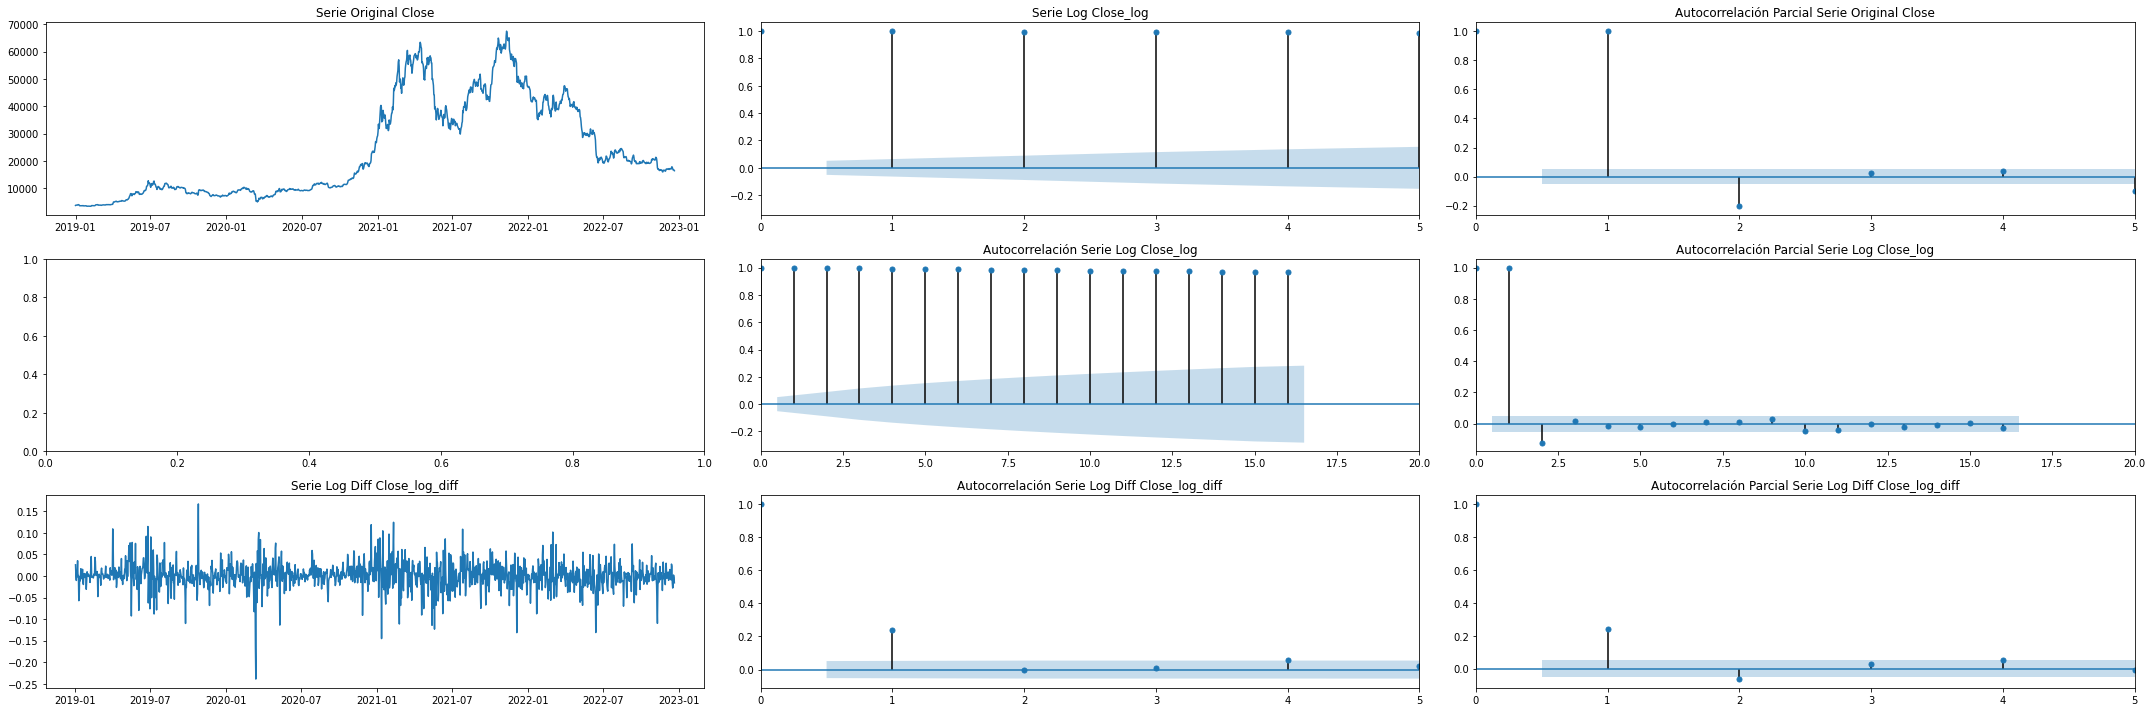

In [143]:
LAGS = 16

fig = plt.figure(figsize = (30, 10))

((ax11, ax12, ax13), (ax21, ax22, ax23), (ax31, ax32, ax33)) = fig.subplots(3, 3)

ax11.plot(xlynx, Close)
ax11.set_title("Serie Original Close")
plot_acf(Close, ax = ax12, lags = LAGS, title = "Autocorrelación Serie Original Close")
plot_pacf(Close, ax = ax13, lags = LAGS, title = "Autocorrelación Parcial Serie Original Close")
ax12.set_xlim(0, 5)
ax13.set_xlim(0, 5)

# ax12.plot(Close_log)
ax12.set_title("Serie Log Close_log")
plot_acf(Close_log, ax = ax22, lags = LAGS, title = "Autocorrelación Serie Log Close_log")
plot_pacf(Close_log, ax = ax23, lags = LAGS, title = "Autocorrelación Parcial Serie Log Close_log")
ax22.set_xlim(0, 20)
ax23.set_xlim(0, 20)

ax31.plot(xlynx[1::], Close_log_diff)
ax31.set_title("Serie Log Diff Close_log_diff")
plot_acf(Close_log_diff, ax = ax32, lags = LAGS, title = "Autocorrelación Serie Log Diff Close_log_diff")
plot_pacf(Close_log_diff, ax = ax33, lags = LAGS, title = "Autocorrelación Parcial Serie Log Diff Close_log_diff")
ax32.set_xlim(0, 5)
ax33.set_xlim(0, 5)

fig.tight_layout()

# Parameter Search

Los posibles candidatos para mi STU Log Lynx serían: 
1. ARMA(1, 1)
2. ARMA(1, 2)
3. ARMA(2, 1)
4. ARMA(2, 2)
5. ARMA(3, 1)
6. ARMA(3, 2)

In [153]:
y_train_arima = Close_log[:-10]
y_test_arima = Close_log[-10:]
pdq = [
    (1, 0, 1),
    (1, 0, 2),
    
    (2, 0, 1),
    (2, 0, 2),

    (3, 0, 1),
    (3, 0, 2),  
    
    (1, 1, 1),
    (1, 1, 2),
    
    (2, 1, 1),
    (2, 1, 2),

    (3, 1, 1),
    (3, 1, 2)
]

seasonal_pdq = (0, 0, 0, 0)

In [160]:
RESULTS_DICT = {}

for param in pdq:

    model = sm.tsa.statespace.SARIMAX(
        endog = y_train_arima,
        order = param,
        seasonal_order = seasonal_pdq,
        enforce_stationarity = False,
        enforce_invertibility = False
    )

    model_fitted = model.fit()

    print('ARIMA{}x{}12 - AIC:{}'.format(param, seasonal_pdq,model_fitted.aic))
    
    RESULTS_DICT[param] = round(model_fitted.aic, 2)

ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:-6042.244974243826
ARIMA(1, 0, 2)x(0, 0, 0, 0)12 - AIC:-6035.045374874602
ARIMA(2, 0, 1)x(0, 0, 0, 0)12 - AIC:-6040.21697796531
ARIMA(2, 0, 2)x(0, 0, 0, 0)12 - AIC:-6033.102623727484
ARIMA(3, 0, 1)x(0, 0, 0, 0)12 - AIC:-6031.099855140103
ARIMA(3, 0, 2)x(0, 0, 0, 0)12 - AIC:-6022.424628243047
ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:-6036.190125271152
ARIMA(1, 1, 2)x(0, 0, 0, 0)12 - AIC:-6029.244332454309
ARIMA(2, 1, 1)x(0, 0, 0, 0)12 - AIC:-6032.865646351242
ARIMA(2, 1, 2)x(0, 0, 0, 0)12 - AIC:-6027.267727140481
ARIMA(3, 1, 1)x(0, 0, 0, 0)12 - AIC:-6027.498811824567
ARIMA(3, 1, 2)x(0, 0, 0, 0)12 - AIC:-6028.321348861615


In [159]:
idx_min_score_aic = np.argmin(list(RESULTS_DICT.values()))
pdq_min_score_aic = list(RESULTS_DICT.keys())[idx_min_score_aic]
min_score_aic = RESULTS_DICT[pdq_min_score_aic]

message = f'''
El score mínimo se alcanza con ARIMA{pdq_min_score_aic}
Con un score AIC de {min_score_aic}.
En la posición {idx_min_score_aic}
'''

print(message)


El score mínimo se alcanza con ARIMA(1, 0, 1)
Con un score AIC de -6042.24.
En la posición 0



# No Graphics

In [229]:
#NO GRAPHICS

df["Close_log"] = df["Close"].apply(np.log1p)
df["Close_log_diff"] = df["Close_log"].diff()

# select x and y to plot
xlynx = df.index

Close = df["Close"]
Close_log = df["Close_log"]
Close_log_diff = df["Close_log_diff"]
Close_log_diff.dropna(inplace = True)

#Falta Parametros
y_train_arima = Close_log[:-10]
y_test_arima = Close_log[-10:]
pdq = [
    (1, 0, 1),
    (1, 1, 1)
]

seasonal_pdq = (0, 0, 0, 0)

RESULTS_DICT = {}

for param in pdq:

    model = sm.tsa.statespace.SARIMAX(
        endog = y_train_arima,
        order = param,
        seasonal_order = seasonal_pdq,
        enforce_stationarity = False,
        enforce_invertibility = False
    )

    model_fitted = model.fit()

    print('ARIMA{}x{}12 - AIC:{}'.format(param, seasonal_pdq,model_fitted.aic))
    
    RESULTS_DICT[param] = round(model_fitted.aic, 2)

idx_min_score_aic = np.argmin(list(RESULTS_DICT.values()))
pdq_min_score_aic = list(RESULTS_DICT.keys())[idx_min_score_aic]
min_score_aic = RESULTS_DICT[pdq_min_score_aic]




message = f'''
El score mínimo se alcanza con ARIMA{pdq_min_score_aic}
Con un score AIC de {min_score_aic}.
En la posición {idx_min_score_aic}
'''

print(message)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:-1133181.3673499806


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:-1133165.0327148093

El score mínimo se alcanza con ARIMA(1, 0, 1)
Con un score AIC de -1133181.37.
En la posición 0



# Best Model

In [230]:
best_arima_model = sm.tsa.statespace.SARIMAX(
    endog = y_train_arima,
    order = pdq_min_score_aic,
    seasonal_order = seasonal_pdq,
    enforce_stationarity = False,
    enforce_invertibility = False
)

best_arima_model_fitted = best_arima_model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


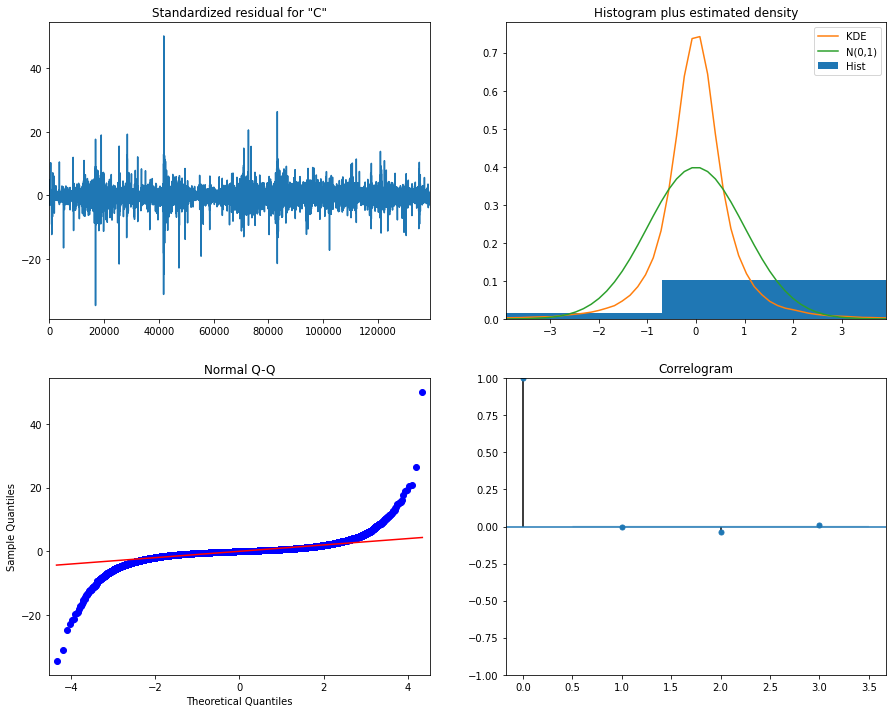

In [231]:
best_arima_model_fitted.plot_diagnostics(figsize = (15, 12), lags = 3);

In [232]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.
pred_uc = best_arima_model_fitted.get_forecast(steps = len(y_test_arima))
y_pred_arima = pred_uc.predicted_mean

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [233]:
y_pred_arima.index = y_test_arima.index

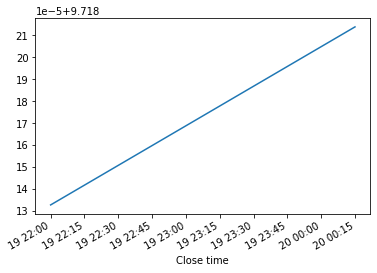

In [237]:
y_pred_arima.plot()

Text(0.5, 0.98, 'Lynx Values and ARIMA Forecast')

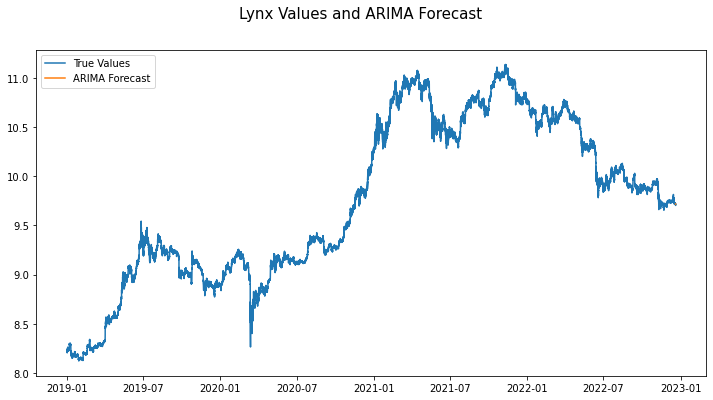

In [234]:
fig = plt.figure(figsize = (12, 6))
ax = fig.subplots(1,1)

ax.plot(Close_log, label = "True Values")
ax.plot(y_pred_arima, label = "ARIMA Forecast")

ax.legend(loc = "upper left")
fig.suptitle("Lynx Values and ARIMA Forecast", fontsize = 15)

Text(0.5, 0.98, 'Lynx Values and ARIMA Forecast')

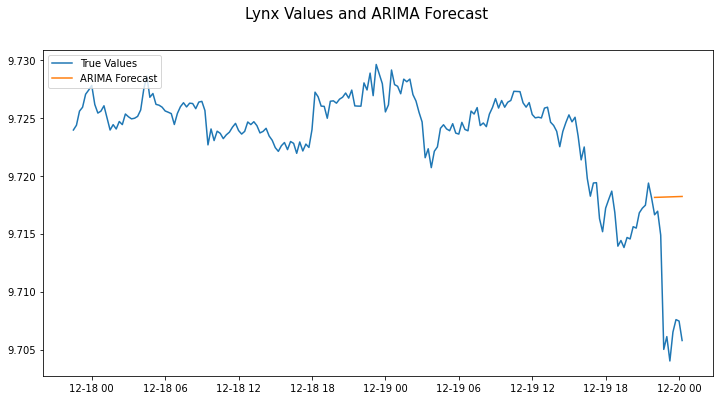

In [236]:
fig = plt.figure(figsize = (12, 6))
ax = fig.subplots(1,1)

ax.plot(Close_log.iloc[-200:], label = "True Values")
ax.plot(y_pred_arima, label = "ARIMA Forecast")

ax.legend(loc = "upper left")
fig.suptitle("Lynx Values and ARIMA Forecast", fontsize = 15)